## Data Analytics Lab 07: Imputation Methods

Use ‘recipe_missing.csv’ (missing dataset) and ‘recipe.csv’ (original dataset)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [24]:
# Read the recipe dataset
recipe = pd.read_csv('recipe.csv')
recipe

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90
...,...,...,...,...,...,...,...,...,...,...
94,Witbier,175,23.00,1.052,1.011,5.36,18.92,3.26,29.00,90
95,Saison,134,3.79,1.056,1.012,5.73,26.51,9.94,4.73,60
96,American IPA,7,24.61,1.058,1.015,5.73,42.52,5.60,28.39,60
97,Saison,134,18.93,1.055,1.014,5.43,16.73,2.84,15.14,60


a) The dataset has missing data. Show the percentage of missing data for each
feature/column in ‘recipe_missing.csv’ and then plot in a bar chart.

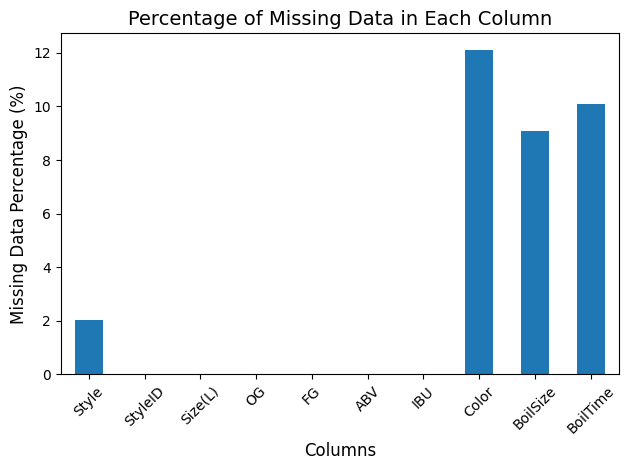

In [25]:
recipe_missing = pd.read_csv('recipe_missing.csv')
# Percentage of missing data in each column
# Simply takes (the number of missing values / total number of samples) * 100
missing_percentage = (recipe_missing.isnull().sum() /
                      len(recipe_missing)) * 100
# Plot in a bar chart
missing_percentage.plot(kind='bar')

# Adding labels and title for better readability
plt.title('Percentage of Missing Data in Each Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Missing Data Percentage (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate column labels for readability
plt.tight_layout()  # Adjust the layout to prevent clipping

# Show the plot
plt.show()

b) Use KNNImputer, k = 5. Initialize missing data using SimpleImputer, using “mean”
strategy. Plot the histogram of imputed data and original data of the last 3 columns.
Compute the Mean Square Error (MSE) between actual data and imputed data.

In [26]:
last_cols = recipe_missing.columns[-3:]

In [56]:
simple_imputer = SimpleImputer(strategy="mean")
# Apply transformation (fills missing values with column means)
# Fit and transform only on the last 3 columns
imputed_part = simple_imputer.fit_transform(recipe_missing[last_cols])
# Replace only those columns in the original DataFrame
imputed = recipe_missing.copy()
imputed[last_cols] = imputed_part
# Show the result
imputed

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.830000,28.390,75.000000
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.640000,24.610,60.000000
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.980000,22.710,60.000000
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,12.744138,26.500,60.000000
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.570000,60.000,90.000000
...,...,...,...,...,...,...,...,...,...,...
94,Witbier,175,23.00,1.052,1.011,5.36,18.92,12.744138,29.000,90.000000
95,Saison,134,3.79,1.056,1.012,5.73,26.51,9.940000,4.730,69.269663
96,American IPA,7,24.61,1.058,1.015,5.73,42.52,5.600000,28.805,60.000000
97,Saison,134,18.93,1.055,1.014,5.43,16.73,2.840000,15.140,60.000000


In [57]:
knn_imputer = KNNImputer(n_neighbors=5)
# Fit and transform only on the last 3 columns
imputed_part = knn_imputer.fit_transform(recipe_missing[last_cols])
# Replace only those columns in the original DataFrame
recipe_imputed = recipe_missing.copy()
recipe_imputed[last_cols] = imputed_part
# Show the result
recipe_imputed

,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.830,28.39,75.0
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.640,24.61,60.0
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.980,22.71,60.0
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,15.048,26.50,60.0
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.570,60.00,90.0
...,...,...,...,...,...,...,...,...,...,...
94,Witbier,175,23.00,1.052,1.011,5.36,18.92,6.220,29.00,90.0
95,Saison,134,3.79,1.056,1.012,5.73,26.51,9.940,4.73,66.0
96,American IPA,7,24.61,1.058,1.015,5.73,42.52,5.600,26.50,60.0
97,Saison,134,18.93,1.055,1.014,5.43,16.73,2.840,15.14,60.0


In [58]:
# Get the last three columns
recipe_imputed.iloc[:, len(recipe_imputed.columns)-3:]

,Color,BoilSize,BoilTime
0,4.830,28.39,75.0
1,15.640,24.61,60.0
2,8.980,22.71,60.0
3,15.048,26.50,60.0
4,4.570,60.00,90.0
...,...,...,...
94,6.220,29.00,90.0
95,9.940,4.73,66.0
96,5.600,26.50,60.0
97,2.840,15.14,60.0


In [59]:
recipe.iloc[:, len(recipe_imputed.columns)-3:]

,Color,BoilSize,BoilTime
0,4.83,28.39,75
1,15.64,24.61,60
2,8.98,22.71,60
3,8.50,26.50,60
4,4.57,60.00,90
...,...,...,...
94,3.26,29.00,90
95,9.94,4.73,60
96,5.60,28.39,60
97,2.84,15.14,60


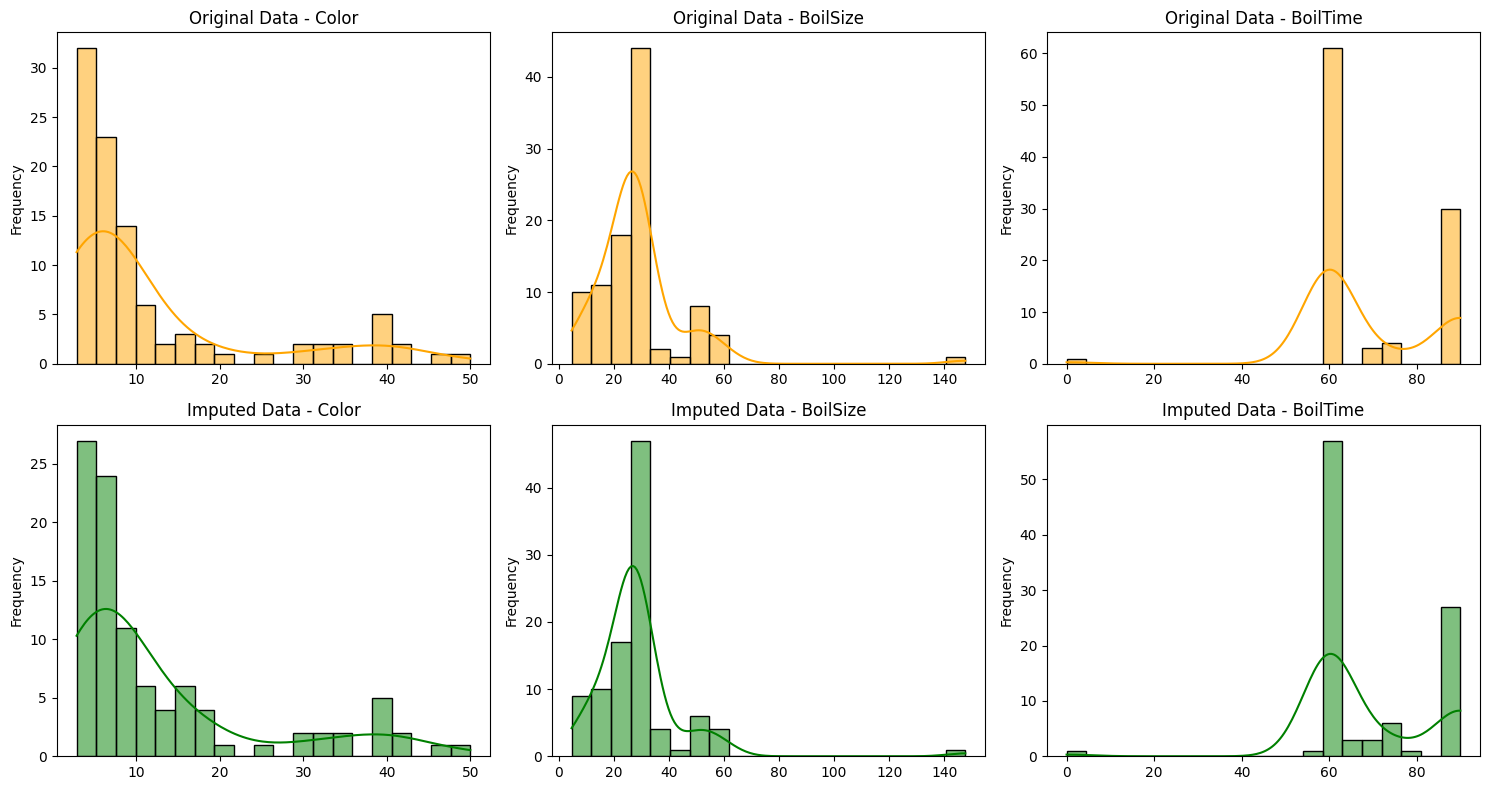

In [60]:
# Plot a Histogram of imputed data and original data
# Select the last 3 columns
last_cols = recipe_imputed.columns[-3:]
# Set up the figure
plt.figure(figsize=(15, 8))

# Loop through the last three columns
for i, col in enumerate(last_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(recipe[col], kde=True, color='orange', bins=20)
    plt.title(f'Original Data - {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, i+3)
    sns.histplot(recipe_imputed[col], kde=True, color='green', bins=20)
    plt.title(f'Imputed Data - {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [61]:
# Mean Squared Error
# Select last three columns
last_cols = recipe_imputed.columns[-3:]

for col in last_cols:
    # Identify positions where original data was missing
    # Retrieve its index
    missing_index = recipe_missing[col][recipe_missing[col].isnull()].index.tolist()
    # Retrieve from recipe_imputed
    predicted_values = recipe_imputed.loc[missing_index, col]
     # Extract actual true values from original dataset
    actual_values = recipe.loc[missing_index, col]
    # Compute and print MSE
    mse = mean_squared_error(actual_values, predicted_values)
    print(f"Mean Squared Error for {col}: {mse:.4f}")

Mean Squared Error for Color: 60.5278
Mean Squared Error for BoilSize: 143.5339
Mean Squared Error for BoilTime: 179.1000


c) Use MICE algorithm for 10 cycles. Initialize missing data using SimpleImputer, using
“mean” strategy. For each cycle, fill in the missing place using Itera veImputer and
es mator=DecisionTree Regressor. Plot the histogram of imputed data and original data
of the last 3 columns. Compute the Mean Square Error (MSE) between actual data and
imputed data.

In [62]:
last_cols = recipe_missing.columns[-3:]

In [63]:
imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(recipe_missing[last_cols])
# Replace only those columns in the original DataFrame
recipe_imputed_iter = recipe_missing.copy()
recipe_imputed_iter[last_cols] = imputed_part
# Show the result
recipe_imputed_iter

/Users/macbook/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime
0,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.830,28.39,75.0
1,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.640,24.61,60.0
2,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.980,22.71,60.0
3,American IPA,7,22.71,1.061,1.017,5.80,54.48,15.048,26.50,60.0
4,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.570,60.00,90.0
...,...,...,...,...,...,...,...,...,...,...
94,Witbier,175,23.00,1.052,1.011,5.36,18.92,6.220,29.00,90.0
95,Saison,134,3.79,1.056,1.012,5.73,26.51,9.940,4.73,66.0
96,American IPA,7,24.61,1.058,1.015,5.73,42.52,5.600,26.50,60.0
97,Saison,134,18.93,1.055,1.014,5.43,16.73,2.840,15.14,60.0


In [64]:
recipe_imputed_iter.iloc[:, len(recipe_imputed.columns)-3:]

,Color,BoilSize,BoilTime
0,4.830,28.39,75.0
1,15.640,24.61,60.0
2,8.980,22.71,60.0
3,15.048,26.50,60.0
4,4.570,60.00,90.0
...,...,...,...
94,6.220,29.00,90.0
95,9.940,4.73,66.0
96,5.600,26.50,60.0
97,2.840,15.14,60.0


In [65]:
recipe.iloc[:, len(recipe_imputed.columns)-3:]

,Color,BoilSize,BoilTime
0,4.83,28.39,75
1,15.64,24.61,60
2,8.98,22.71,60
3,8.50,26.50,60
4,4.57,60.00,90
...,...,...,...
94,3.26,29.00,90
95,9.94,4.73,60
96,5.60,28.39,60
97,2.84,15.14,60


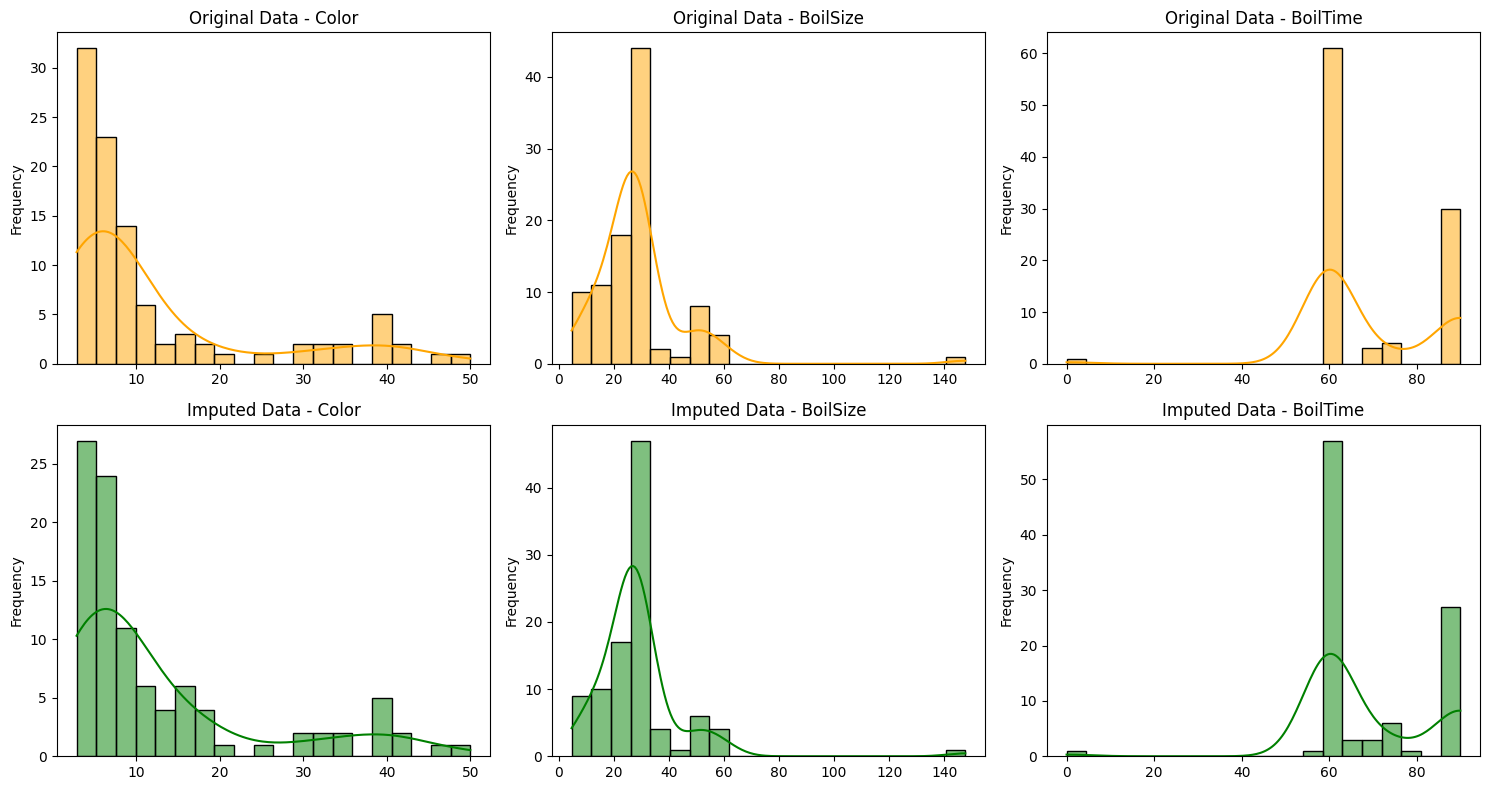

In [66]:
# Plot a Histogram of imputed data and original data
# Select the last 3 columns
last_cols = recipe_imputed_iter.columns[-3:]
# Set up the figure
plt.figure(figsize=(15, 8))

# Loop through the last three columns
for i, col in enumerate(last_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(recipe[col], kde=True, color='orange', bins=20)
    plt.title(f'Original Data - {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, i+3)
    sns.histplot(recipe_imputed_iter[col], kde=True, color='green', bins=20)
    plt.title(f'Imputed Data - {col}')
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [67]:
# Mean Squared Error
# Select last three columns
last_cols = recipe_imputed_iter.columns[-3:]

for col in last_cols:
    # Identify positions where original data was missing
    # Retrieve its index
    missing_index = recipe_missing[col][recipe_missing[col].isnull()].index.tolist()
    # Retrieve from recipe_imputed
    predicted_values = recipe_imputed_iter.loc[missing_index, col]
     # Extract actual true values from original dataset
    actual_values = recipe.loc[missing_index, col]
    # Compute and print MSE
    mse = mean_squared_error(actual_values, predicted_values)
    print(f"Mean Squared Error for {col}: {mse:.4f}")

Mean Squared Error for Color: 60.5278
Mean Squared Error for BoilSize: 143.5339
Mean Squared Error for BoilTime: 179.1000


## Compare the methods

- KNNImputer finds k nearest samples of the non-missing rows for the row with missing values, then impute the missing values based on the mean (or median) of these neighbors (if the values are numerical) or major votes (if the value are categorical).

- IterativeImputer (or MICE) starts by imputing all the missing values in every column, then revert the missing status for one of the columns. Then train a predictive model (Linear Regression, Decision Tree, etc.) to predict that missing values

Pros (Both Methods):
- Flexible and Sophisticated: They are more advanced than traditional methods (like simple mean/median imputation).

- Captures Relationships: They leverage the correlations and relationships between different features in the dataset to estimate missing values intelligently.

- Contextual Imputation: Missing values are not simply imputed with the same global statistical measure (like the overall column mean). The imputed value is specific to the local context and patterns of that particular data point.

- Statistically Efficient: By using more information from the data, they generally produce more accurate and less biased estimates.

Cons (Both Methods):
- Computationally Expensive: They require significantly more processing time and resources compared to simple imputation techniques, especially for large datasets (KNNImputer requires distance calculations for all pairs; IterativeImputer trains multiple ML models).

- Complexity: They are more complex to implement and tune (e.g., choosing k for KNN, or selecting the right estimator for MICE).

Even advanced methods like KNNImputer and IterativeImputer cannot generate truly “new” extreme values. They improve accuracy by considering patterns in the dataset, but the imputed values tend to be close to the mean/median/mode initially, which can reduce variance or distort rare/extreme values.